<a href="https://colab.research.google.com/github/kovcharenko51/Sample-ML-Repo/blob/hw05/hw_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [226]:
import numpy as np
import matplotlib.pyplot as plt

In [227]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [228]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

Для начала разобьем датасет на тренировочную и тестовую выборки и применим MinMaxScaling (это поможет при использовании KNN)

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

train, test = train_test_split(df, test_size=0.2, random_state=42)

X_train = train.drop(columns='Class')
X_test = test.drop(columns='Class')

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = train['Class']
y_test = test['Class']

In [230]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [231]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
log_preds = log_reg.predict(X_test)
log_preds_proba = log_reg.predict_proba(X_test)

In [232]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_preds_proba = knn.predict_proba(X_test)                       

In [233]:
const_preds = np.zeros(X_test.shape[0], dtype=int)

In [234]:
from sklearn.metrics import accuracy_score

print('LogisticRegression:', accuracy_score(y_test, log_preds))
print('KNN:', accuracy_score(y_test, knn_preds))
print('Constant prediction:', accuracy_score(y_test, const_preds))

LogisticRegression: 0.9989817773252344
KNN: 0.9995611109160493
Constant prediction: 0.9982795547909132


In [235]:
from sklearn.metrics import precision_score

print('LogisticRegression:', precision_score(y_test, log_preds))
print('KNN:', precision_score(y_test, knn_preds))
print('Constant prediction:', precision_score(y_test, const_preds))

LogisticRegression: 0.8448275862068966
KNN: 0.974025974025974
Constant prediction: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [236]:
from sklearn.metrics import recall_score

print('LogisticRegression:', recall_score(y_test, log_preds))
print('KNN:', recall_score(y_test, knn_preds))
print('Constant prediction:', recall_score(y_test, const_preds))

LogisticRegression: 0.5
KNN: 0.7653061224489796
Constant prediction: 0.0


In [237]:
from sklearn.metrics import f1_score

print('LogisticRegression:', f1_score(y_test, log_preds))
print('KNN:', f1_score(y_test, knn_preds))
print('Constant prediction:', f1_score(y_test, const_preds))

LogisticRegression: 0.6282051282051282
KNN: 0.8571428571428571
Constant prediction: 0.0


In [238]:
from sklearn.metrics import roc_auc_score

print('LogisticRegression:', roc_auc_score(y_test, log_preds))
print('KNN:', roc_auc_score(y_test, knn_preds))
print('Constant prediction:', roc_auc_score(y_test, const_preds))

LogisticRegression: 0.7499208638154192
KNN: 0.8826354754056941
Constant prediction: 0.5


Text(0.5, 1.0, 'ROC curve')

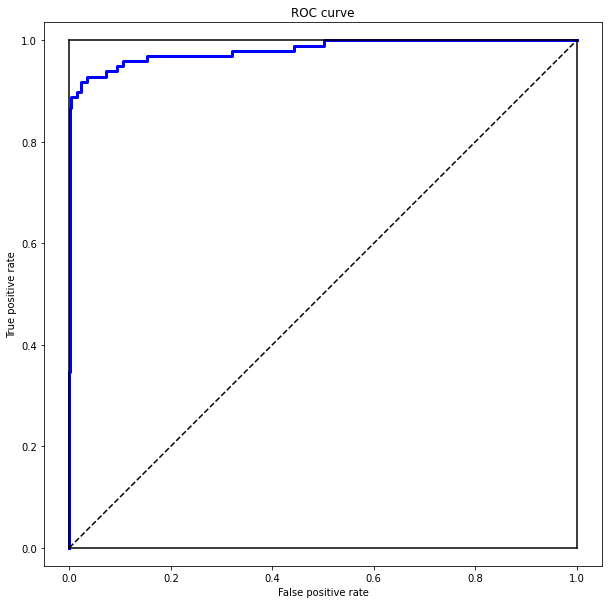

In [239]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, log_preds_proba[:, 1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

Text(0.5, 1.0, 'ROC curve')

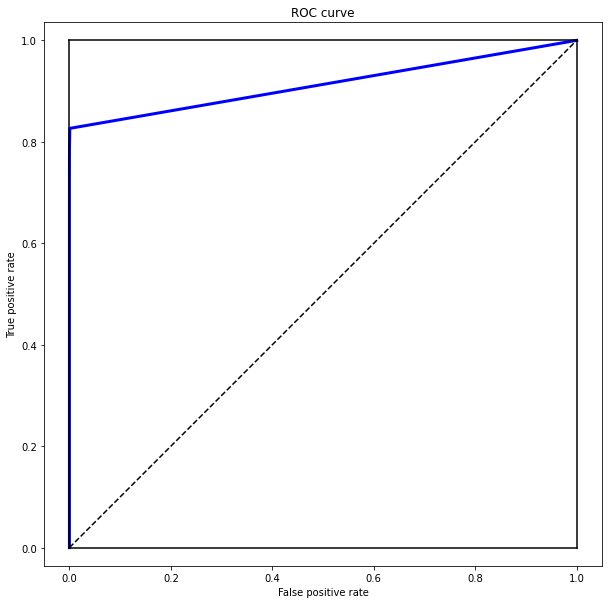

In [240]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, knn_preds_proba[:, 1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Как обсуждалось на лекции и как видно из эксперимента, метрика accuracy дает неудовлетворительные результаты (показатели отличаются в 3 знаке после запятой) в силу несбалансированности датасета. Лучше всего из изученных метрик показывает себя f1_score, попробуем максимизировать его

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

Для начала получим валидационную выборку:

In [241]:
train, val = train_test_split(train, test_size=0.25, random_state=42)

X_train = train.drop(columns='Class')
X_val = test.drop(columns='Class')

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

y_train = train['Class']
y_val = test['Class']

In [242]:
log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
log_preds = log_reg.predict(X_val)

print('LogisticRegression:', f1_score(y_val, log_preds))

LogisticRegression: 0.5960264900662252


Как было замечено ранее, датасет сильно несбалансирован. Для логистической регресии попробуем подобрать веса классов:

In [243]:
log_reg = LogisticRegression(max_iter=1000, class_weight={0: 578, 1: 1}).fit(X_train, y_train)
log_preds = log_reg.predict(X_val)

print('LogisticRegression:', f1_score(y_val, log_preds))

LogisticRegression: 0.20183486238532108


Видим, что значение f1_score начительно упало. Это связано с тем, что ниже стала точность, но полнота возросла. Как обсуждалось на лекции, использовать взвешенные классы нужно только в определенных случаях (как раз тогда, когда требуется полнота). В нашей задаче обойдемся без весов, чтобы максимизировать f1_score.

Теперь попробуем подобрать некоторые гиперпараметры модели. Для начала посмотрим, что случится, если изменить penalty (регуляризацию) и solver:

In [244]:
log_reg = LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear').fit(X_train, y_train)
log_preds = log_reg.predict(X_val)

print('LogisticRegression:', f1_score(y_val, log_preds))

LogisticRegression: 0.5771812080536912


In [245]:
log_reg = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear').fit(X_train, y_train)
log_preds = log_reg.predict(X_val)

print('LogisticRegression:', f1_score(y_val, log_preds))

LogisticRegression: 0.6459627329192548


Смогли немного увеличить значение метрики. Попробуем теперь подобрать коэффициент регуляризации: 

In [246]:
lambds = np.logspace(-3, 3, num=10)
scores = np.array([])

for lambd in lambds:
  log_reg = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', C=lambd).fit(X_train, y_train)
  log_preds = log_reg.predict(X_val)

  scores = np.append(scores, f1_score(y_val, log_preds))

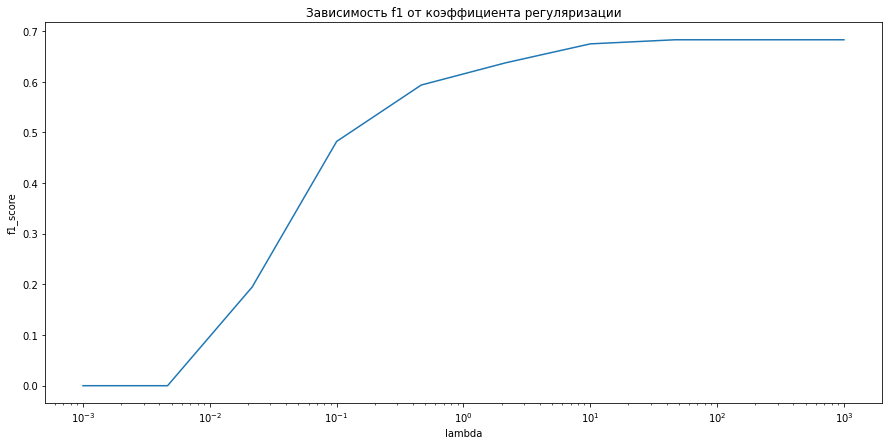

In [247]:
plt.figure(figsize=(15, 7))
plt.plot(lambds, scores)
plt.xlabel('lambda')
plt.ylabel('f1_score')
plt.title('Зависимость f1 от коэффициента регуляризации')
plt.xscale('log')

In [248]:
lambd = lambds[scores.argmin()]

Теперь попробуем увеличить значение метрики для KNN. Попробуем подобрать оптимальное число соседей:

In [249]:
counts = np.arange(3, 8)
scores = np.array([])

for count in counts:
  knn = KNeighborsClassifier(n_neighbors=count).fit(X_train, y_train)
  knn_preds = knn.predict(X_val)

  scores = np.append(scores, f1_score(y_val, knn_preds))

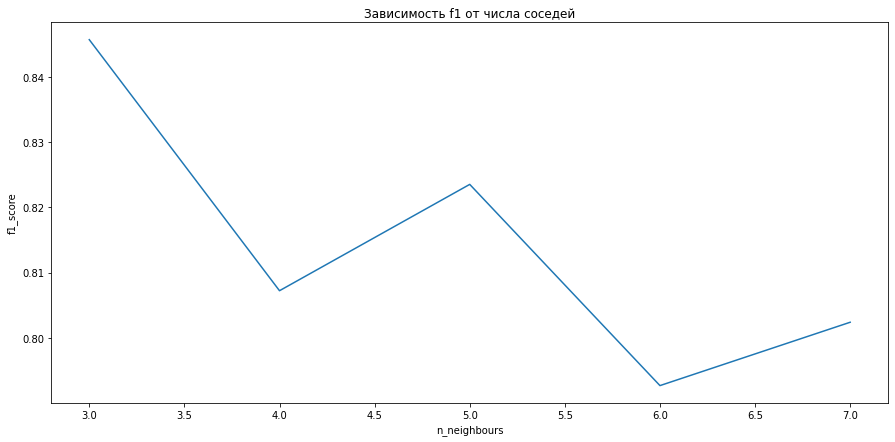

In [250]:
plt.figure(figsize=(15, 7))
plt.xlabel('n_neighbours')
plt.ylabel('f1_score')
plt.title('Зависимость f1 от числа соседей')
plt.plot(counts, scores)

In [251]:
count = counts[scores.argmax()]

In [252]:
knn = KNeighborsClassifier(n_neighbors=count).fit(X_train, y_train)
knn_preds = knn.predict(X_val)

print('KNN:', f1_score(y_val, knn_preds))

KNN: 0.8457142857142858


Попробуем изменить параметр weights на distance:

In [253]:
knn = KNeighborsClassifier(n_neighbors=count, weights='distance').fit(X_train, y_train)
knn_preds = knn.predict(X_test)

print('KNN:', f1_score(y_val, knn_preds))

KNN: 0.8505747126436782


In [254]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

X_train = train.drop(columns='Class')
X_test = test.drop(columns='Class')

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = train['Class']
y_test = test['Class']

In [255]:
log_reg = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', C=lambd).fit(X_train, y_train)
log_preds = log_reg.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=count).fit(X_train, y_train)
knn_preds = knn.predict(X_test)

print('LogisticRegression:', f1_score(y_test, log_preds))
print('KNN:', f1_score(y_test, knn_preds))

LogisticRegression: 0.0
KNN: 0.8342857142857143


Смогли немного улучшить показатель f1_score для обеих моделей. Видим, что KNN показывает лучший результат

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

Рассмотрим датасет, содержащий данные о рейтинге ESRB видеоигр

In [256]:
train = pd.read_csv('/content/drive/MyDrive/Video_games_esrb_rating.csv')
test = pd.read_csv('/content/drive/MyDrive/test_esrb.csv')

In [257]:
X_train = train.drop(columns=['esrb_rating', 'title'])
X_test = test.drop(columns=['esrb_rating', 'title'])

y_train = train['esrb_rating']
y_test = test['esrb_rating']

In [258]:
y_train.value_counts()

T     689
E     416
ET    403
M     387
Name: esrb_rating, dtype: int64

In [259]:
ratings = {'T': 0, 'E': 1, 'ET': 2, 'M': 3}

y_train = y_train.map(ratings)
y_test = y_test.map(ratings)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [260]:
log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
log_preds = log_reg.predict(X_test)
log_preds_proba = log_reg.predict_proba(X_test)

In [261]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_preds_proba = knn.predict_proba(X_test) 

In [262]:
const_preds = np.zeros(X_test.shape[0], dtype=int)

In [263]:
print('LogisticRegression:', accuracy_score(y_test, log_preds))
print('KNN:', accuracy_score(y_test, knn_preds))
print('Constant prediction:', accuracy_score(y_test, const_preds))

LogisticRegression: 0.798
KNN: 0.772
Constant prediction: 0.368


In [264]:
print('LogisticRegression:', precision_score(y_test, log_preds, average='macro'))
print('KNN:', precision_score(y_test, knn_preds, average='macro'))

LogisticRegression: 0.831008363919392
KNN: 0.7757545210166178


In [265]:
print('LogisticRegression:', precision_score(y_test, log_preds, average='micro'))
print('KNN:', precision_score(y_test, knn_preds, average='micro'))

LogisticRegression: 0.798
KNN: 0.772


In [266]:
print('LogisticRegression:', recall_score(y_test, log_preds, average='macro'))
print('KNN:', recall_score(y_test, knn_preds, average='macro'))

LogisticRegression: 0.7863630089717046
KNN: 0.7763112491373361


In [267]:
print('LogisticRegression:', recall_score(y_test, log_preds, average='micro'))
print('KNN:', recall_score(y_test, knn_preds, average='micro'))

LogisticRegression: 0.798
KNN: 0.772


In [268]:
print('LogisticRegression:', f1_score(y_test, log_preds, average='macro'))
print('KNN:', f1_score(y_test, knn_preds, average='macro'))

LogisticRegression: 0.799751310195062
KNN: 0.7749186160950867


In [269]:
print('LogisticRegression:', f1_score(y_test, log_preds, average='micro'))
print('KNN:', f1_score(y_test, knn_preds, average='micro'))

LogisticRegression: 0.798
KNN: 0.772


Видим, что модели логистической регрессии и KNN дают примерно одинаковые значения для всех метрик, кроме precision с macro-усреднением. Это значит, что точность первой модели в предположении One vs The Rest выше

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Попробуем максимизировать метрику accuracy, потому что ее значения близки для двух моделей, но константое предсказание дает плохой результат для нее.

Снова подготовим выборку и получим валидационную:

In [270]:
train, val = train_test_split(train, test_size=0.25, random_state=42)

X_train = train.drop(columns=['esrb_rating', 'title'])
X_val = val.drop(columns=['esrb_rating', 'title'])

y_train = train['esrb_rating']
y_val = val['esrb_rating']

Для начала, аналогично бинарной классификации, попробуем сбалансировать веса классов:

In [271]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced').fit(X_train, y_train)
log_preds = log_reg.predict(X_val)

print('LogisticRegression:', accuracy_score(y_val, log_preds))

LogisticRegression: 0.8586497890295358


Получили хороший результат. Попробуем теперь другую регуляризацию и solver:

In [272]:
log_reg = LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear', class_weight='balanced').fit(X_train, y_train)
log_preds = log_reg.predict(X_val)

print('LogisticRegression:', accuracy_score(y_val, log_preds))

LogisticRegression: 0.8438818565400844


In [273]:
log_reg = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', class_weight='balanced').fit(X_train, y_train)
log_preds = log_reg.predict(X_val)

print('LogisticRegression:', accuracy_score(y_val, log_preds))

LogisticRegression: 0.8502109704641351


Видим, что l2-регуляризация в стандартном случае справляется лучше. Попробуем подобрать для нее оптимальный коэффициент:

In [274]:
lambds = np.logspace(-3, 5, num=10)
scores = np.array([])

for lambd in lambds:
  log_reg = LogisticRegression(max_iter=1000, C=lambd, class_weight='balanced').fit(X_train, y_train)
  log_preds = log_reg.predict(X_val)

  scores = np.append(scores, accuracy_score(y_val, log_preds))

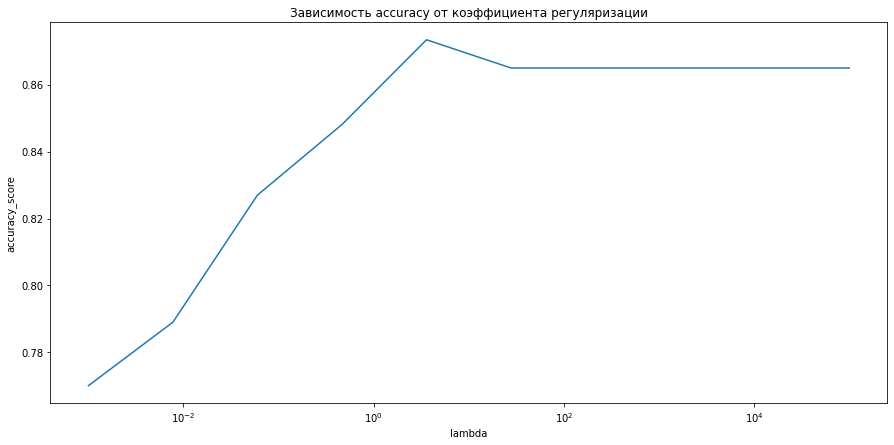

In [275]:
plt.figure(figsize=(15, 7))
plt.plot(lambds, scores)
plt.xlabel('lambda')
plt.ylabel('accuracy_score')
plt.title('Зависимость accuracy от коэффициента регуляризации')
plt.xscale('log')

In [276]:
lambd = lambds[scores.argmax()]

In [277]:
X_train = train.drop(columns=['esrb_rating', 'title'])
X_test = test.drop(columns=['esrb_rating', 'title'])

y_train = train['esrb_rating']
y_test = test['esrb_rating']

In [278]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', C=lambd).fit(X_train, y_train)
log_preds = log_reg.predict(X_test)

print('LogisticRegression:', accuracy_score(y_test, log_preds))

LogisticRegression: 0.816


Получили удовлетворительный результат: получилось увеличить (хоть и незначительно) показатель accuracy. Попробуем теперь подобрать гиперпараметры для KNN.

Начнем с числа соседей:

In [279]:
train, val = train_test_split(train, test_size=0.25, random_state=42)

X_train = train.drop(columns=['esrb_rating', 'title'])
X_val = val.drop(columns=['esrb_rating', 'title'])

y_train = train['esrb_rating']
y_val = val['esrb_rating']

In [280]:
counts = np.arange(3, 10)
scores = np.array([])

for count in counts:
  knn = KNeighborsClassifier(n_neighbors=count).fit(X_train, y_train)
  knn_preds = knn.predict(X_val)

  scores = np.append(scores, accuracy_score(y_val, knn_preds))

Text(0, 0.5, 'accuracy_score')

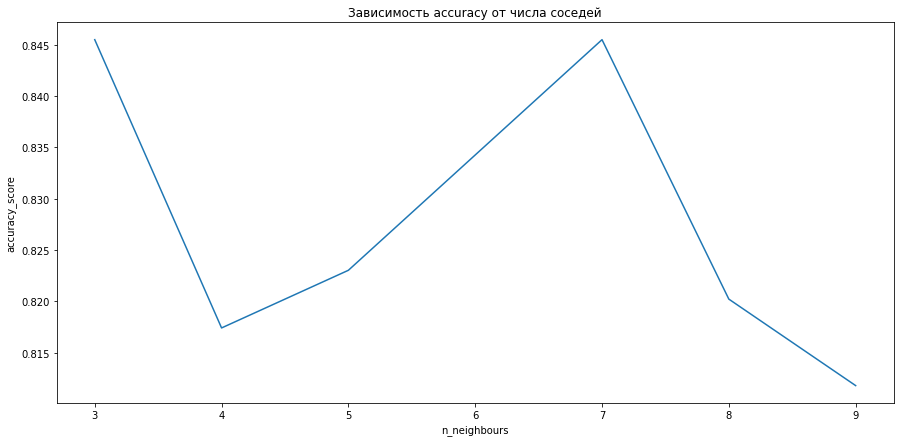

In [281]:
plt.figure(figsize=(15, 7))
plt.plot(counts, scores)
plt.title('Зависимость accuracy от числа соседей')
plt.xlabel('n_neighbours')
plt.ylabel('accuracy_score')

In [282]:
count = counts[scores.argmax()]

In [283]:
knn = KNeighborsClassifier(n_neighbors=count).fit(X_train, y_train)
knn_preds = knn.predict(X_val)

print('KNN:', accuracy_score(y_val, knn_preds))

KNN: 0.8455056179775281


Также попробуем изменить параметр weights на 'distance' (теперь точки, находящиеся ближе, будут вносить больший вклад)

In [284]:
knn = KNeighborsClassifier(n_neighbors=count, weights='distance').fit(X_train, y_train)
knn_preds = knn.predict(X_val)

print('KNN:', accuracy_score(y_val, knn_preds))

KNN: 0.8707865168539326


Снова смогли улучшить значение. Таким образом, получили следующие показатели accuracy для двух моделей:

In [285]:
X_train = train.drop(columns=['esrb_rating', 'title'])
X_test = test.drop(columns=['esrb_rating', 'title'])

y_train = train['esrb_rating']
y_test = test['esrb_rating']

In [286]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', C=lambd).fit(X_train, y_train)
log_preds = log_reg.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=count).fit(X_train, y_train)
knn_preds = knn.predict(X_test)

print('LogisticRegression:', accuracy_score(y_test, log_preds))
print('KNN:', accuracy_score(y_test, knn_preds))

LogisticRegression: 0.812
KNN: 0.804


Таким образом, для нашего датасета лучше подоходит модель логистической регрессии, хоть KNN и незначительно уступет ей.